# Project notebook

- Easy access to all the experimental data generated in the lab
- All the results from statistical analysis
- Visualization of reports
- All the python functionality at hand

## Library import

In [6]:
from report_manager import project
from analytics_core import analytics_factory
from plotly.offline import init_notebook_mode, iplot
import missingno as msno
import warnings

warnings.filterwarnings('ignore')
init_notebook_mode(connected=True)
%matplotlib inline

## Creating a Project object

- Connects to the database
- Extracts all the project information depending on the data types: Cinical, Proteomics, Whole-exome sequencing, etc.
- Runs all the default analyses
- Returns all datasets and analyses results, and plots

In [7]:
p = project.Project('P0000001', datasets={}, report={})

In [8]:
p.build_project()

In [9]:
p.generate_report()

## Visualizing the Project report

In [5]:
plots = p.show_report("notebook")

#### The result of the previous command is a dictionary where the keys correspond to the different tabs in the app ("Project information", "Clinical", "Proteomics", "Multiomics" and "Knowledge graph")

In [6]:
plots.keys()

dict_keys(['PROJECT INFORMATION', 'CLINICAL', 'PROTEOMICS', 'MULTIOMICS', 'KNOWLEDGE GRAPH'])

In [7]:
plots['PROTEOMICS'][0]

Cytoscape(data={'elements': [{'data': {'degree': 2, 'radius': 2, 'color': '#1acf66', 'cluster': 0, 'id': 'APOC…

In [8]:
plots['PROTEOMICS'][1]

Cytoscape(data={'elements': [{'data': {'degree': 3, 'radius': 3, 'color': '#1acf66', 'cluster': 0, 'id': 'ACTB…

## Access to datasets

### Clinical data

In [9]:
clin_dataset = p.get_dataset('clinical').get_dataframe('processed')
clin_dataset.head()

Age  Alanine aminotransferase measurement  \
0   73                                  24.0   
1   49                                  27.0   
2   66                                  18.0   
3   61                                  22.0   
4   44                                  18.0   

   Alkaline phosphatase measurement  Aspartate aminotransferase measurement  \
0                                54                                      30   
1                                27                                      28   
2                                69                                      21   
3                               101                                      26   
4                                61                                      25   

   Bilirubin level  Body height  Body mass index  Diastole  \
0             15.0        182.0        27.774423        83   
1             17.0        177.0        28.727377        95   
2              9.0        158.0        28.841532        97   
3             12.0        165.0        42.056933        93   
4              8.0        182.0        29.434851        76   

   Fasting blood glucose level  Gamma glutamyl transferase measurement  ...  \
0                         5.07                                    21.0  ...   
1                         6.09                                    38.0  ...   
2                         4.93                                    18.0  ...   
3                         5.33                                    20.0  ...   
4                         4.80                                    13.0  ...   

   High density lipoprotein measurement  \
0                                  1.26   
1                                  1.70   
2                                  1.12   
3                                  0.91   
4                                  1.21   

   Low density lipoprotein cholesterol measurement  Systole  \
0                                              2.1      157   
1                                              4.3      134   
2                                              4.1      143   
3                                              4.8      141   
4                                              3.9      123   

   Triglycerides measurement  VLDL cholesterol measurement  \
0                       0.58                           0.3   
1                       1.24                           0.6   
2                       1.12                           0.5   
3                       2.20                           1.0   
4                       0.90                           0.4   

   Weight (property) (qualifier value)  biological_sample    group  \
0                                 92.0               BS30  Healthy   
1                                 90.0               BS31  Healthy   
2                                 72.0               BS32  Healthy   
3                                114.5               BS33  Healthy   
4                                 97.5               BS34  Healthy   

  platelets/liter  subject  
0             227      S30  
1             261      S31  
2             228      S32  
3             306      S33  
4             377      S34  

[5 rows x 21 columns]

#### Further dataset manipulation and visualization

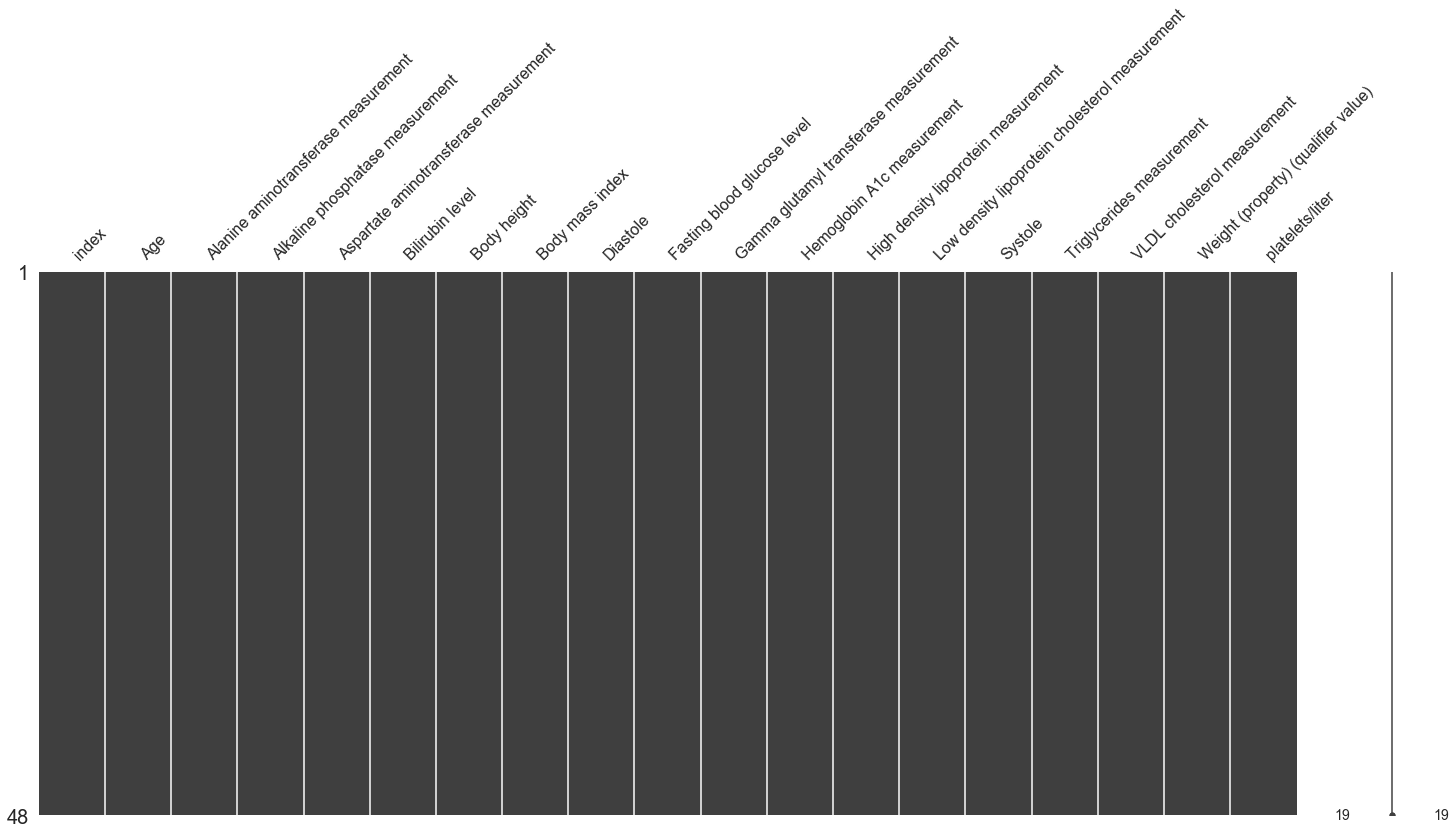

In [10]:
clin_dataset = clin_dataset.reset_index().set_index('subject').drop(['group', 'biological_sample'], axis=1)#.pivot_table(index='subject', columns='clinical_variable', values='value', aggfunc='first')
msno.matrix(clin_dataset)


### Proteomics dataset (original)

In [11]:
dataset = p.get_dataset("proteomics").get_dataframe("original")

In [12]:
dataset.head()

LFQ_intensity       group identifier  name sample subject
0      21.593090  NAFLD+T2DM     M0R009  A1BG   AS62     S62
1      37.957887   Cirrhosis     P01023   A2M   AS75     S75
2      38.117296   Cirrhosis     P01023   A2M   AS73     S73
3      26.922750   Cirrhosis     F8W7L3   A2M   AS73     S73
4      37.384952   Cirrhosis     P01023   A2M   AS70     S70

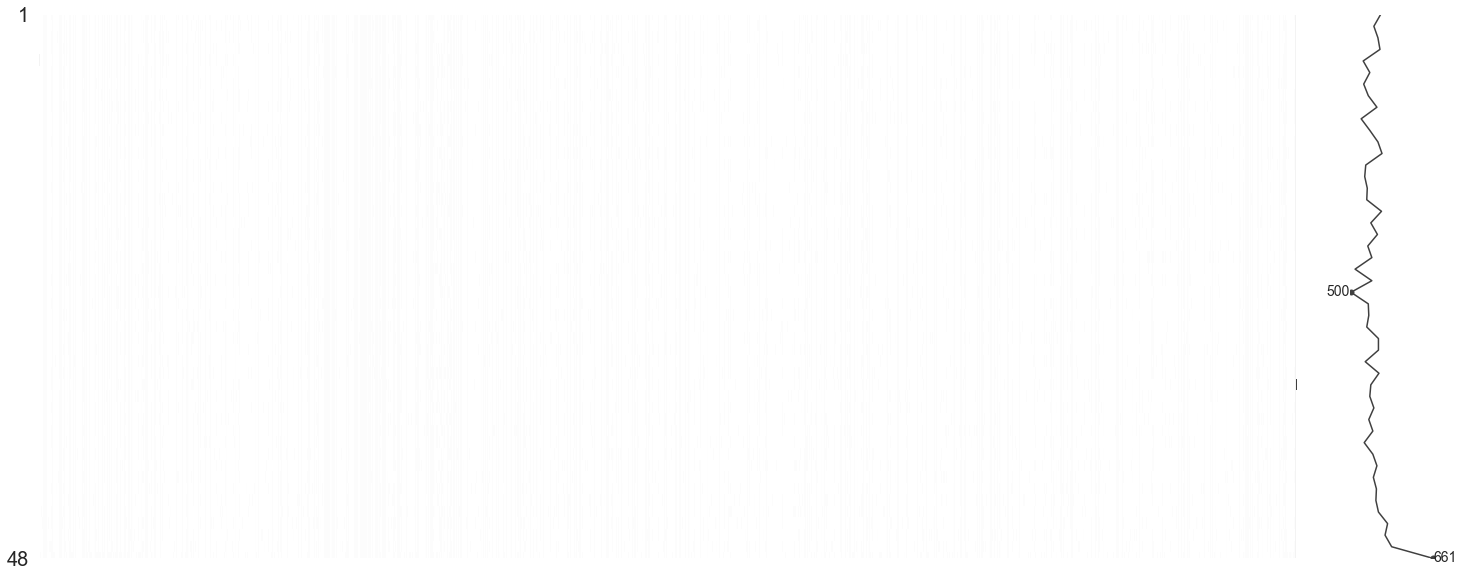

In [13]:
dataset = dataset.drop(['group'], axis=1).pivot_table(index='sample', columns='identifier', values='LFQ_intensity', aggfunc='first')
msno.matrix(dataset)

### Proteomics dataset (processed)
After log transformation, filtering and imputation.

In [14]:
proteomics = p.get_dataset("proteomics").get_dataframe("processed")

In [15]:
proteomics

A2M~P01023  A30~A2MYE2  ABI3BP~Q7Z7G0  ACE~P12821  ACTB~P60709  \
0    38.005564   28.173504      21.548328   22.174034    27.090330   
1    37.309118   27.981907      27.342062   23.847270    27.461155   
2    37.384952   28.857627      20.127020   22.863630    27.929764   
3    38.417225   28.978380      25.501910   22.992774    27.152479   
4    37.471303   28.748744      21.912270   22.209670    27.537048   
5    38.117296   28.829685      24.404660   23.752973    27.281358   
6    38.271740   29.145183      22.969478   23.857852    27.026544   
7    37.957887   28.844877      23.107861   24.955888    26.051540   
8    37.316049   29.532875      25.028927   19.820868    27.995557   
9    37.884674   29.190794      20.091842   21.692543    27.674585   
10   37.172267   27.313458      25.233156   21.748439    27.979074   
11   36.897240   28.550101      25.251670   21.007545    26.688458   
12   37.253761   28.393359      24.360115   20.192510    27.327060   
13   37.101435   27.986905      25.613204   20.423214    27.323972   
14   37.169563   28.806458      26.438967   23.431104    26.683380   
15   37.270827   28.667565      20.690821   23.971409    27.322597   
16   37.318660   28.428382      20.600620   24.137348    27.230777   
17   37.319754   29.097857      20.880765   20.741035    27.451519   
18   36.581751   28.159377      23.666657   21.783765    26.329799   
19   37.110992   27.359845      27.093658   23.769714    27.376666   
20   36.961826   28.305782      26.043021   23.514431    26.886463   
21   37.030135   28.298809      25.499327   20.817119    27.143165   
22   37.330229   28.127326      25.636481   19.976680    27.074084   
23   37.014632   28.108091      23.512196   21.424720    26.518078   
24   36.934845   28.140778      24.578480   21.665944    26.921048   
25   37.224322   26.986959      25.564570   23.072254    27.435712   
26   37.285370   28.557935      25.631895   20.240157    27.330227   
27   37.004099   28.627075      24.339941   20.694247    27.982451   
28   37.750974   28.316136      25.099529   25.828615    27.051651   
29   36.879890   27.899775      24.276113   23.975753    28.432132   
30   37.662423   28.969116      25.876333   23.889297    27.261499   
31   38.122126   28.689625      24.708778   23.628119    26.632424   
32   38.295883   28.105695      23.881290   22.600005    26.643752   
33   36.755707   28.502601      21.343655   21.189228    28.777184   
34   38.025399   28.338411      24.752156   20.051360    26.430107   
35   37.374787   28.637581      28.085830   23.962081    27.806181   
36   37.413368   27.596478      25.785717   22.932704    26.880930   
37   36.653442   28.568990      22.959646   23.541324    27.002280   
38   37.288038   28.277417      20.221432   19.549118    26.739310   
39   36.763148   28.712240      19.053582   23.405752    26.330346   
40   37.326801   27.104096      23.605145   22.866406    29.181725   
41   37.548117   28.629579      23.989885   21.886174    28.114062   
42   37.075271   28.349337      19.211270   23.427775    29.222210   
43   36.772519   27.832918      25.926714   20.625756    27.762686   
44   37.614412   28.024273      25.154792   23.489591    27.651436   
45   37.869701   28.045415      23.041130   23.732792    28.066765   
46   36.754339   28.155329      24.203873   20.443245    26.981308   
47   37.280884   27.855006      25.031009   21.480989    27.752003   

    ACTN1~P12814  ADA2~Q9NZK5  ADAMTS13~Q76LX8  ADAMTSL4~Q6UY14  ADH4~P08319  \
0      25.039968    23.442151        24.010605        25.085820    23.389032   
1      25.896268    23.754503        24.135818        19.190373    22.148706   
2      24.295225    23.359443        24.121788        24.923476    23.017163   
3      25.231288    23.701340        24.568309        24.878802    26.388112   
4      22.392992    22.406264        24.961173        22.001670    24.339540   
5      26.089360    23.462388        24.748725        24.554030    23.513367   
6      25.376

## Analyses results

#### Differential regulation: result from statistical analysis of the data

In [16]:
reg_table = p.get_dataset("proteomics").get_dataframe("regulation table")
reg_table.head()

-log10 pvalue        FC           Method  SAMR test statistics  \
0       2.392948  1.617763  SAMR Multiclass              0.151486   
1       2.392948  1.593280  SAMR Multiclass              0.151486   
2       2.392948  1.299539  SAMR Multiclass              0.151486   
3       2.392948  1.446935  SAMR Multiclass              0.151486   
4       2.392948 -1.015366  SAMR Multiclass              0.151486   

                   correction  effsize efftype     group1      group2  \
0  permutation FDR (250 perm)    1.662  hedges  Cirrhosis     Healthy   
1  permutation FDR (250 perm)    1.609  hedges  Cirrhosis   NAFLD+NGT   
2  permutation FDR (250 perm)    0.905  hedges  Cirrhosis  NAFLD+T2DM   
3  permutation FDR (250 perm)    1.270  hedges  Cirrhosis        T2DM   
4  permutation FDR (250 perm)   -0.053  hedges    Healthy   NAFLD+NGT   

   identifier  ...  mean(group1)  mean(group2)     padj  padj_THSD    pvalue  \
0  A2M~P01023  ...        37.814        37.120  0.03306   0.001393  0.004046   
1  A2M~P01023  ...        37.814        37.142  0.03306   0.002201  0.004046   
2  A2M~P01023  ...        37.814        37.435  0.03306   0.220367  0.004046   
3  A2M~P01023  ...        37.814        37.280  0.03306   0.044508  0.004046   
4  A2M~P01023  ...        37.120        37.142  0.03306   0.900000  0.004046   

   rejected  s0  std_error  t-statistics       tail  
0      True   0      0.179         3.879  two-sided  
1      True   0      0.179         3.756  two-sided  
2      True   0      0.179         2.114  two-sided  
3      True   0      0.190         2.811  two-sided  
4      True   0      0.179        -0.123  two-sided  

[5 rows x 21 columns]